In [1]:
import pandas as pd
import numpy as np

In [2]:
#read file
df=pd.read_excel('../Dry-beans-classification/DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [3]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
df.shape

(13611, 17)

In [5]:
#separating labels from the data and creating a different file
target_class=df['Class']

Encoding target 

In [6]:
#checking uique classes in target 
print(target_class.unique())
print(target_class.value_counts())


['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


In [7]:
#changing target class to df
target_class=pd.DataFrame(target_class)
target_class
#mapping the features
target_class['Class']=target_class['Class'].map({'SEKER':0, 'BARBUNYA':1, 'BOMBAY':2, 'CALI':3, 'HOROZ':4, 'SIRA':5, 'DERMASON':6})

In [8]:
df=df.drop(['Class'],axis=1)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


Checking for null data

In [9]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [10]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

Visualizing to find any outliers or anomalies in the data

In [11]:
import matplotlib.pyplot as plt

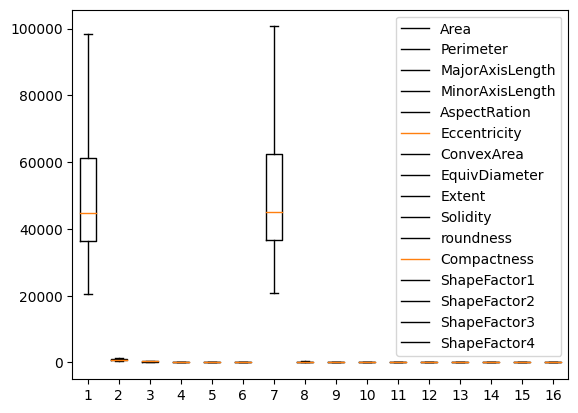

In [12]:
#box plot
plt.boxplot(df,showfliers=False)
plt.legend(df.columns)
plt.show()

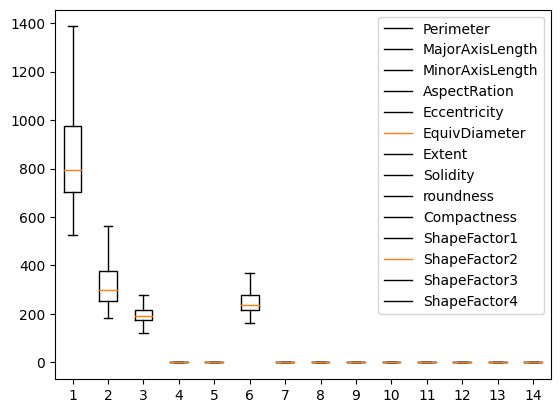

In [13]:
#creating box plot for feature beside area and convex area because of scale
temp_df=df.drop(['Area','ConvexArea'],axis=1)
plt.boxplot(temp_df,showfliers=False)
plt.legend(temp_df.columns)
plt.show()

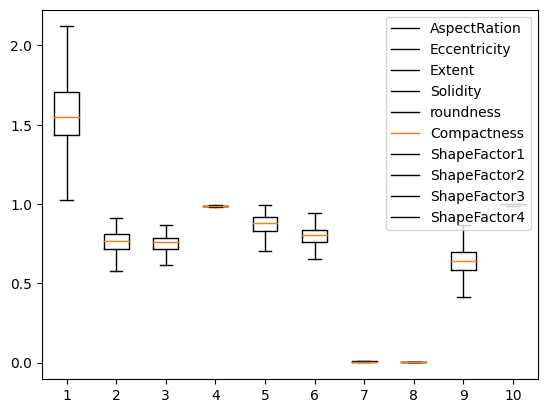

In [14]:
temp_df=temp_df.drop(['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter'],axis=1)
plt.boxplot(temp_df,showfliers=False)
plt.legend(temp_df.columns)
plt.show()

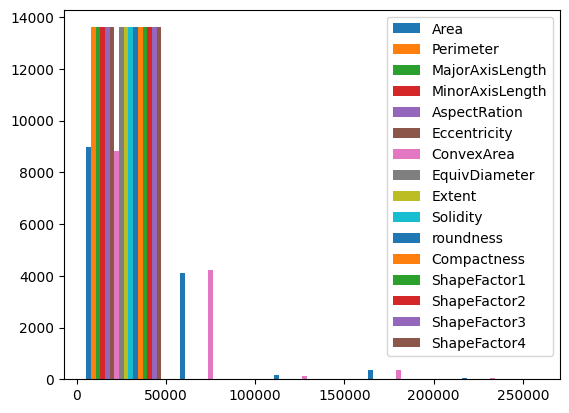

In [15]:
#histogram
plt.hist(df,bins=5,label=df.columns)
plt.legend(df.columns)
plt.show()

Area,ConvexArea has the highest variance.
Perimeter,MajorAxisLength,MinorAxisLength,EquivDiameter the next highest variance.


In [16]:
#Expoting tarining and testing dataset
df.to_excel('../Dry-beans-classification/DryBeanDataset/data_set.xlsx',index=False)
target_class.to_excel('../Dry-beans-classification/DryBeanDataset/target_set.xlsx',index=False)

Partitioning the dataset into a separate training and test set


In [17]:
from sklearn.model_selection import train_test_split
train_dataset=pd.read_excel('../Dry-beans-classification/DryBeanDataset/data_set.xlsx')
target_set=pd.read_excel('../Dry-beans-classification/DryBeanDataset/target_set.xlsx')

In [18]:
train_dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [19]:
target_set

,Class
0,0
1,0
2,0
3,0
4,0
...,...
13606,6
13607,6
13608,6
13609,6


In [20]:
X_train,X_test,y_train,y_test=train_test_split(train_dataset,target_set,test_size=0.3,random_state=17,shuffle=True,stratify=None)

In [21]:
print(X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape)

(9527, 16) (9527, 1) (4084, 16) (4084, 1)


In [22]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
5057,80599,1106.493,434.394910,239.280660,1.815420,0.834613,82146,320.346428,0.675667,0.981168,0.827260,0.737454,0.005390,0.000983,0.543839,0.987296
12895,36466,714.949,275.523762,168.810640,1.632147,0.790323,36805,215.476108,0.773338,0.990789,0.896495,0.782060,0.007556,0.001743,0.611618,0.998250
6882,57827,966.867,407.488740,181.301425,2.247576,0.895568,58458,271.344105,0.589951,0.989206,0.777333,0.665894,0.007047,0.000855,0.443414,0.996607
8876,45146,804.811,311.494708,185.284709,1.681168,0.803856,45606,239.753358,0.795805,0.989914,0.875873,0.769687,0.006900,0.001494,0.592418,0.995954
2292,61387,960.455,318.988242,245.260357,1.300611,0.639406,62237,279.571737,0.803789,0.986343,0.836242,0.876433,0.005196,0.001891,0.768134,0.999044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,28736,646.635,246.115966,148.987943,1.651919,0.795954,29138,191.279407,0.800245,0.986204,0.863610,0.777192,0.008565,0.001928,0.604028,0.997805
9529,48573,851.032,335.006647,185.663256,1.804378,0.832378,49133,248.686679,0.793754,0.988602,0.842778,0.742334,0.006897,0.001292,0.551059,0.994319
406,35762,690.560,236.821441,192.707579,1.228916,0.581250,36157,213.386018,0.791160,0.989075,0.942386,0.901042,0.006622,0.002693,0.811876,0.997728
2191,58294,917.877,342.575826,218.133290,1.570489,0.771075,59011,272.437564,0.703269,0.987850,0.869490,0.795262,0.005877,0.001450,0.632442,0.993243


In [23]:
y_train

,Class
5057,3
12895,6
6882,4
8876,5
2292,1
...,...
10992,6
9529,5
406,0
2191,1


In [24]:
X_test


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
12363,33958,677.104,253.688948,171.045970,1.483162,0.738517,34241,207.934289,0.823244,0.991735,0.930767,0.819643,0.007471,0.002080,0.671814,0.996409
2802,71598,1066.952,400.059642,228.747662,1.748912,0.820404,72858,301.929470,0.664039,0.982706,0.790353,0.754711,0.005588,0.001118,0.569589,0.996161
11939,32260,665.909,251.575588,163.507870,1.538615,0.759989,32582,202.668961,0.736496,0.990117,0.914207,0.805599,0.007798,0.002026,0.648989,0.998544
9756,50243,855.416,319.156655,202.298115,1.577655,0.773454,51152,252.925630,0.810371,0.982229,0.862841,0.792481,0.006352,0.001545,0.628026,0.990809
6746,56392,930.097,371.957125,195.005333,1.907420,0.851553,57178,267.956199,0.732782,0.986253,0.819164,0.720395,0.006596,0.001096,0.518970,0.989893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,43409,796.222,289.739123,192.829010,1.502570,0.746374,44138,235.095843,0.726632,0.983484,0.860441,0.811405,0.006675,0.001785,0.658378,0.989260
7833,40177,782.791,271.313686,189.436487,1.432215,0.715884,40985,226.174590,0.724432,0.980285,0.823940,0.833628,0.006753,0.002012,0.694935,0.995296
10959,28583,635.193,243.614834,149.720554,1.627130,0.788855,28947,190.769510,0.706695,0.987425,0.890238,0.783078,0.008523,0.001977,0.613212,0.997775
11465,30506,653.974,240.751654,161.636423,1.489464,0.741111,30904,197.082332,0.768645,0.987121,0.896343,0.818613,0.007892,0.002186,0.670127,0.998129


In [25]:
y_test

,Class
12363,6
2802,1
11939,6
9756,5
6746,4
...,...
8487,5
7833,5
10959,6
11465,6


In [26]:
#extracting class labels
label=df.columns
label

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

Scaling features using minmax scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [28]:
X_train=scaler.fit_transform(X_train)
print(X_train)

[[0.25695998 0.39829074 0.45166985 ... 0.13516081 0.24131436 0.76138909]
 [0.06851526 0.13022633 0.16554905 ... 0.3803166  0.36383095 0.97195434]
 [0.15972519 0.30269801 0.40321288 ... 0.09367644 0.05978718 0.9403699 ]
 ...
 [0.06550923 0.11352878 0.09584766 ... 0.68638666 0.72581686 0.96191532]
 [0.16171924 0.26915778 0.28630723 ... 0.28566255 0.40147219 0.8756949 ]
 [0.03306632 0.06119671 0.07408789 ... 0.61823047 0.54163256 0.93626455]]


In [29]:
X_test=scaler.fit_transform(X_test)
print(X_test)

[[0.06083494 0.10933451 0.12760189 ... 0.50708425 0.45679521 0.93319362]
 [0.23675896 0.40043922 0.4010317  ... 0.18359117 0.27350203 0.92820237]
 [0.05289873 0.10097506 0.123654   ... 0.4889913  0.41586942 0.97611164]
 ...
 [0.03571295 0.07803901 0.1087828  ... 0.47246225 0.35171922 0.96065368]
 [0.04470078 0.09206303 0.1034342  ... 0.54282956 0.45376934 0.96777246]
 [0.06027408 0.0973311  0.0702235  ... 0.83424071 0.80601539 0.97842097]]


Chaning nD array to dataframe

In [30]:
X_train=pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.256960,0.398291,0.451670,0.345789,0.558868,0.881585,0.253371,0.389833,0.363903,0.820899,0.627373,0.284070,0.340351,0.135161,0.241314,0.761389
1,0.068515,0.130226,0.165549,0.137104,0.427384,0.813305,0.066457,0.132880,0.689989,0.948454,0.787953,0.414865,0.622641,0.380317,0.363831,0.971954
2,0.159725,0.302698,0.403213,0.174093,0.868906,0.975558,0.155720,0.269767,0.077729,0.927463,0.511574,0.074235,0.556313,0.093676,0.059787,0.940370
3,0.105578,0.191749,0.230331,0.185889,0.462553,0.834167,0.102739,0.192364,0.764995,0.936845,0.740124,0.378584,0.537159,0.299775,0.329125,0.927811
4,0.174926,0.298308,0.243827,0.363497,0.189534,0.580640,0.171298,0.289927,0.791653,0.889503,0.648206,0.691590,0.315168,0.427985,0.646749,0.987210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,0.035509,0.083456,0.112587,0.078402,0.441569,0.821986,0.034851,0.073593,0.779820,0.887661,0.711682,0.400591,0.754150,0.439688,0.350111,0.963391
9523,0.120211,0.223393,0.272675,0.187010,0.550946,0.878140,0.117278,0.214252,0.758150,0.919461,0.663364,0.298377,0.536801,0.234697,0.254365,0.896384
9524,0.065509,0.113529,0.095848,0.207870,0.138099,0.490983,0.063786,0.127759,0.749487,0.925733,0.894391,0.763750,0.500986,0.686387,0.725817,0.961915
9525,0.161719,0.269158,0.286307,0.283164,0.383149,0.783630,0.157999,0.272447,0.456055,0.909484,0.725320,0.453577,0.403834,0.285663,0.401472,0.875695


In [31]:
X_test=pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.060835,0.109335,0.127602,0.124605,0.337380,0.754348,0.060118,0.116380,0.900522,0.946992,0.880419,0.509057,0.672308,0.507084,0.456795,0.933194
1,0.236759,0.400439,0.401032,0.306111,0.533016,0.873239,0.238016,0.361420,0.365427,0.757411,0.600188,0.318924,0.397979,0.183591,0.273502,0.928202
2,0.052899,0.100975,0.123654,0.100894,0.378202,0.785524,0.052475,0.102654,0.608958,0.913022,0.847369,0.467933,0.720049,0.488991,0.415869,0.976112
3,0.136949,0.242482,0.249900,0.222912,0.406942,0.805073,0.138022,0.233670,0.857255,0.747402,0.744855,0.429523,0.509378,0.327319,0.378282,0.820604
4,0.165688,0.298248,0.348534,0.199972,0.649704,0.918464,0.165782,0.272854,0.596476,0.831895,0.657688,0.218441,0.544875,0.176056,0.182740,0.802189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.105008,0.198282,0.194946,0.193126,0.351667,0.765756,0.105710,0.187189,0.575805,0.773737,0.740067,0.484936,0.556341,0.407780,0.432705,0.789461
4080,0.089902,0.188252,0.160526,0.182454,0.299874,0.721488,0.091185,0.163932,0.568411,0.706585,0.667220,0.550008,0.567752,0.484149,0.498252,0.910811
4081,0.035713,0.078039,0.108783,0.057525,0.443364,0.827434,0.035730,0.071633,0.508797,0.856500,0.799534,0.401989,0.825622,0.472462,0.351719,0.960654
4082,0.044701,0.092063,0.103434,0.095007,0.342019,0.758115,0.044745,0.088090,0.717014,0.850119,0.811717,0.506041,0.733680,0.542830,0.453769,0.967772


Labeling dataframe

In [32]:
X_train.columns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
X_train


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.256960,0.398291,0.451670,0.345789,0.558868,0.881585,0.253371,0.389833,0.363903,0.820899,0.627373,0.284070,0.340351,0.135161,0.241314,0.761389
1,0.068515,0.130226,0.165549,0.137104,0.427384,0.813305,0.066457,0.132880,0.689989,0.948454,0.787953,0.414865,0.622641,0.380317,0.363831,0.971954
2,0.159725,0.302698,0.403213,0.174093,0.868906,0.975558,0.155720,0.269767,0.077729,0.927463,0.511574,0.074235,0.556313,0.093676,0.059787,0.940370
3,0.105578,0.191749,0.230331,0.185889,0.462553,0.834167,0.102739,0.192364,0.764995,0.936845,0.740124,0.378584,0.537159,0.299775,0.329125,0.927811
4,0.174926,0.298308,0.243827,0.363497,0.189534,0.580640,0.171298,0.289927,0.791653,0.889503,0.648206,0.691590,0.315168,0.427985,0.646749,0.987210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,0.035509,0.083456,0.112587,0.078402,0.441569,0.821986,0.034851,0.073593,0.779820,0.887661,0.711682,0.400591,0.754150,0.439688,0.350111,0.963391
9523,0.120211,0.223393,0.272675,0.187010,0.550946,0.878140,0.117278,0.214252,0.758150,0.919461,0.663364,0.298377,0.536801,0.234697,0.254365,0.896384
9524,0.065509,0.113529,0.095848,0.207870,0.138099,0.490983,0.063786,0.127759,0.749487,0.925733,0.894391,0.763750,0.500986,0.686387,0.725817,0.961915
9525,0.161719,0.269158,0.286307,0.283164,0.383149,0.783630,0.157999,0.272447,0.456055,0.909484,0.725320,0.453577,0.403834,0.285663,0.401472,0.875695


In [33]:
X_test.columns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
X_test


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.060835,0.109335,0.127602,0.124605,0.337380,0.754348,0.060118,0.116380,0.900522,0.946992,0.880419,0.509057,0.672308,0.507084,0.456795,0.933194
1,0.236759,0.400439,0.401032,0.306111,0.533016,0.873239,0.238016,0.361420,0.365427,0.757411,0.600188,0.318924,0.397979,0.183591,0.273502,0.928202
2,0.052899,0.100975,0.123654,0.100894,0.378202,0.785524,0.052475,0.102654,0.608958,0.913022,0.847369,0.467933,0.720049,0.488991,0.415869,0.976112
3,0.136949,0.242482,0.249900,0.222912,0.406942,0.805073,0.138022,0.233670,0.857255,0.747402,0.744855,0.429523,0.509378,0.327319,0.378282,0.820604
4,0.165688,0.298248,0.348534,0.199972,0.649704,0.918464,0.165782,0.272854,0.596476,0.831895,0.657688,0.218441,0.544875,0.176056,0.182740,0.802189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.105008,0.198282,0.194946,0.193126,0.351667,0.765756,0.105710,0.187189,0.575805,0.773737,0.740067,0.484936,0.556341,0.407780,0.432705,0.789461
4080,0.089902,0.188252,0.160526,0.182454,0.299874,0.721488,0.091185,0.163932,0.568411,0.706585,0.667220,0.550008,0.567752,0.484149,0.498252,0.910811
4081,0.035713,0.078039,0.108783,0.057525,0.443364,0.827434,0.035730,0.071633,0.508797,0.856500,0.799534,0.401989,0.825622,0.472462,0.351719,0.960654
4082,0.044701,0.092063,0.103434,0.095007,0.342019,0.758115,0.044745,0.088090,0.717014,0.850119,0.811717,0.506041,0.733680,0.542830,0.453769,0.967772


Visualizing the data after scaling

Training dataset

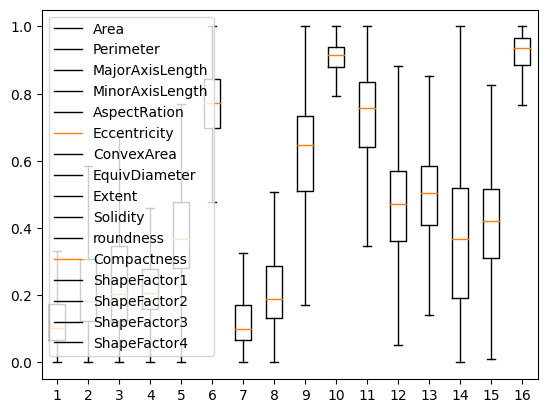

In [34]:
#box plot
plt.boxplot(X_train,showfliers=False)
plt.legend(X_train.columns)
plt.show()

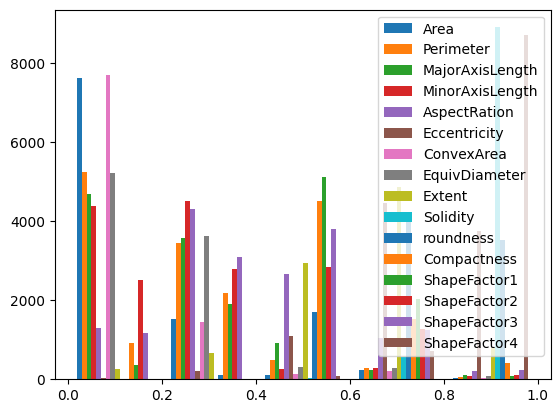

In [35]:
#histogram
plt.hist(X_train,bins=5,label=df.columns)
plt.legend(X_train.columns)
plt.show()

Test dataset

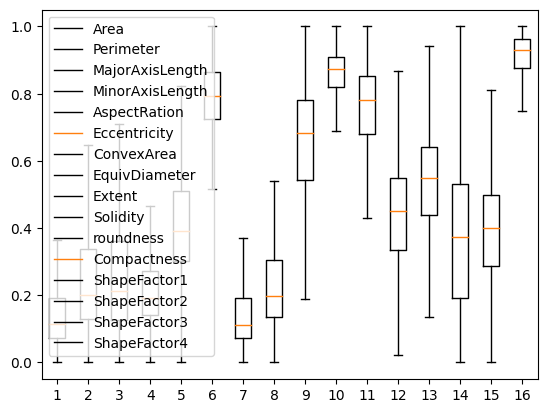

In [36]:
#box plot
plt.boxplot(X_test,showfliers=False)
plt.legend(X_test.columns)
plt.show()

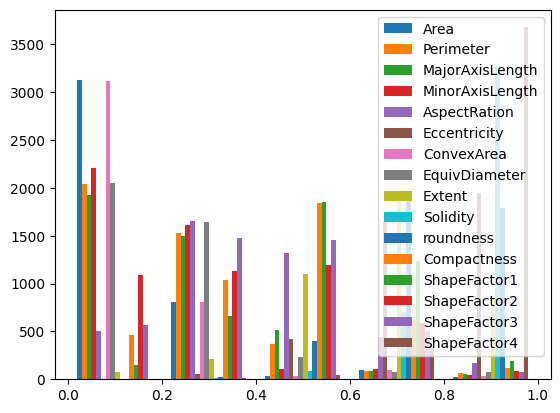

In [37]:
#histogram
plt.hist(X_test,bins=5,label=df.columns)
plt.legend(X_test.columns)
plt.show()

Exporting to xlsx file

In [38]:
X_train.to_excel('../Dry-beans-classification/DryBeanDataset/Postprocessed/TrainingData.xlsx',index=False)
X_test.to_excel('../Dry-beans-classification/DryBeanDataset/Postprocessed/TestData.xlsx',index=False)
y_train.to_excel('../Dry-beans-classification/DryBeanDataset/Postprocessed/TrainingTarget.xlsx',index=False)
y_test.to_excel('../Dry-beans-classification/DryBeanDataset/Postprocessed/TestTarget.xlsx',index=False)

Specifying model

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv

In [40]:
class classification(nn.Module):
    def __init__(self, input_size, output_size) -> None:
        super().__init__(classification,self).__init__()
        self.fc1=nn.Linear(input_size,16)
        self.softmax=nn.Softmax()
        self.fc2=nn.Linear(16,32)
        self.softmax=nn.Softmax()
        self.fc3=nn.Linear(32,16)
        self.softmax=nn.Linear()
        self.fc4=nn.Linear(32,output_size)
        self.softmax=nn.Softmax()

    def forward(self, x):
        x=self.fc1(x)
        x=self.softmax(x)
        x=self.fc2(x)
        x=self.softmax(x)
        x=self.fc3(x)
        x=self.softmax(x)
        x=self.fc4(x)
        x=self.softmax(x)
        return x


Changing dataframe to tensor

In [41]:
#imporing the data
train_data=pd.read_excel('../Dry-beans-classification/DryBeanDataset/Postprocessed/TrainingData.xlsx')
test_data=pd.read_excel('../Dry-beans-classification/DryBeanDataset/Postprocessed/TestData.xlsx')
train_target=pd.read_excel('../Dry-beans-classification/DryBeanDataset/Postprocessed/TrainingTarget.xlsx')
test_target=pd.read_excel('../Dry-beans-classification/DryBeanDataset/Postprocessed/TestTarget.xlsx')

In [43]:
#converting dataframe to tensor
train_data=torch.tensor(train_data)
test_data=torch.tensor(test_data)
train_target=torch.tensor(train_target)
test_target=torch.tensor(test_target)

Moving model and tensors to GPU

In [55]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
#moving data to gpu
train_data=train_data.to(device)
test_data=test_data.to(device)
train_target=train_target.to(device)
test_target=test_target.to(device)
#moving model to gpu
classification=classification.to(device)


AttributeError: 'bool' object has no attribute '_apply'

Creating model

In [ ]:
#specifying parameters
input_size=16
output_size=7
#creating model
model=classification(input_size,output_size)

In [ ]:
#defining loss function and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [ ]:
#training
for epoch in range(100):
    #forward pass
    outputs=model(train_data)
    #computing loss 
    loss=criterion(outputs,train_target)
    #back propagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

In [ ]:
#saving the model
torch.save(model.state_dict(),"model.pth")

Performance

In [ ]:
#loading model
model=model.load_state_dict(torch.load('model.pth'))
model.eval()

Performance on Training data

In [ ]:
from sklearn.metrics import accuracy_score
predicted=